# Package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.dates as mdates

# Importation des données de TRAIN stationnaires et normalisées

In [2]:
df_stationary_normalized_train = pd.read_csv("df_stationary_normalized_train.csv", index_col="date")
df_stationary_normalized_train.index = pd.to_datetime(df_stationary_normalized_train.index)

# Analyse globale

In [3]:
df_stationary_normalized_train.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,6.110000e+02,6.110000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,610.000000,6.100000e+02,6.100000e+02,6.100000e+02
mean,-2.761930e-17,-1.162918e-17,-5.824121e-18,-2.912060e-17,4.368091e-17,-3.494472e-17,0.000000,1.146624e-17,2.038442e-17,-6.988945e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.849027e+00,-1.004830e+01,-5.728296e+00,-5.569240e+00,-5.070061e+00,-6.410365e+00,-4.147238,-4.858369e+00,-5.397252e+00,-3.183122e+00
25%,-5.796727e-01,-2.513813e-01,-3.642159e-01,-4.626765e-01,-5.507995e-01,-4.961863e-01,-0.549620,-5.189437e-01,-1.488107e-01,-6.175705e-01
50%,-3.478036e-02,3.164090e-02,3.080756e-02,6.553014e-02,3.444373e-03,7.273446e-02,0.038926,-3.613037e-03,-7.076897e-02,-9.561981e-03
75%,5.101120e-01,3.364340e-01,4.127625e-01,5.274084e-01,5.919130e-01,6.333522e-01,0.582189,5.764259e-01,2.494425e-01,5.463296e-01
max,4.869251e+00,5.692084e+00,7.264659e+00,6.826997e+00,4.071328e+00,2.987820e+00,3.937471,6.452734e+00,1.139688e+01,6.309023e+00


D'après ce tableau, le minimum de TB3MS s'écarte drastiquement des 25% valeurs les plus faibles. Il en est ainsi pour RPI. 

Est-ce qu'il y a beaucoup de valeurs qui s'écartent de la majorité dans les autres variables? Pourrait-on généraliser celà? 

df_stationary_normalized.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

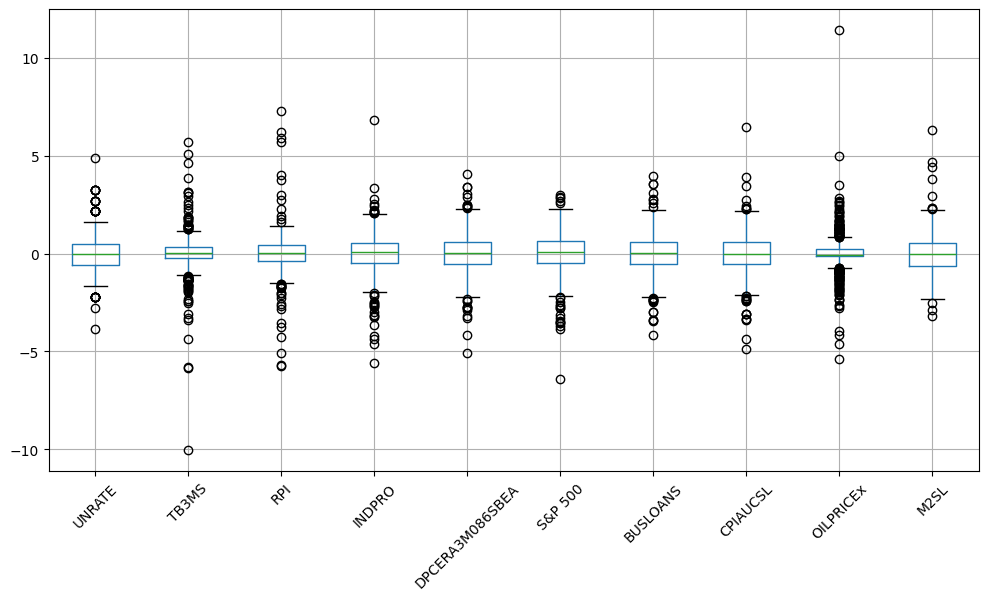

In [4]:
df_stationary_normalized_train.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

Effectivement, des valeurs extrêmes sont présentes presques partout. 

Ces valeurs correspondent à des évènements particuliers? 

# Vérifier si les minimum et maximum correspondent aux années de crises de l'USA

In [5]:
df_train = pd.read_csv("df_train.csv", index_col="date")
df_train.index = pd.to_datetime(df_train.index)

In [6]:
# --- Valeurs minimales ---
min_values = []
for col in df_stationary_normalized_train.columns:
    idx = df_stationary_normalized_train[col].idxmin()
    val = df_stationary_normalized_train.loc[idx, col]
    min_values.append({"Variable": col, "Date_min": idx, "Valeur_min": val})

df_stationary_normalized_train_min = pd.DataFrame(min_values)

Les minimums des variables sont enregistrés en : 1983, 1980, 1993, 2008, 1987, 1973, 1986, 1970

In [7]:
# --- Valeurs maximales ---
max_values = []
for col in df_stationary_normalized_train.columns:
    idx = df_stationary_normalized_train[col].idxmax()
    val = df_stationary_normalized_train.loc[idx, col]
    max_values.append({"Variable": col, "Date_max": idx, "Valeur_max": val})

df_stationary_normalized_train_max = pd.DataFrame(max_values)

Les maximums des variables sont enregistrées en : 1975, 1981, 2008, 1959, 2001, 2009, 1973, 1974, 1983.

In [8]:
# --- Génération automatique du commentaire avec print ---

print("### Commentaire sur les valeurs extrêmes (minimales et maximales)\n")
print("Les valeurs extrêmes des différentes séries correspondent en grande partie "
      "aux grandes récessions, chocs pétroliers et crises financières aux États-Unis.\n")

for i in range(len(df_stationary_normalized_train_min)):
    var = df_stationary_normalized_train_min.loc[i, "Variable"]

    date_min = df_stationary_normalized_train_min.loc[i, "Date_min"].date()
    val_min = df_stationary_normalized_train_min.loc[i, "Valeur_min"]

    date_max = df_stationary_normalized_train_max.loc[i, "Date_max"].date()
    val_max = df_stationary_normalized_train_max.loc[i, "Valeur_max"]

    print(f"- **{var}**")
    print(f"  - Min ({date_min}, {val_min:.2f})")
    print(f"  - Max ({date_max}, {val_max:.2f})\n")

print("---\n")
print("**En résumé :**")
print("- Les valeurs minimales coïncident avec les phases de récession (1970, 1973-75, 1981-82, 1990-91, 2008-09) "
      "et les ajustements liés aux chocs pétroliers (1973, 1986).")
print("- Les valeurs maximales apparaissent dans des périodes de tension (inflation des années 70, taux élevés début 80) "
      "ou de reprise (1983, 2001, 2009).")

### Commentaire sur les valeurs extrêmes (minimales et maximales)

Les valeurs extrêmes des différentes séries correspondent en grande partie aux grandes récessions, chocs pétroliers et crises financières aux États-Unis.

- **UNRATE**
  - Min (1983-07-01, -3.85)
  - Max (1975-01-01, 4.87)

- **TB3MS**
  - Min (1980-05-01, -10.05)
  - Max (1981-05-01, 5.69)

- **RPI**
  - Min (1993-01-01, -5.73)
  - Max (2008-05-01, 7.26)

- **INDPRO**
  - Min (2008-09-01, -5.57)
  - Max (1959-12-01, 6.83)

- **DPCERA3M086SBEA**
  - Min (1987-01-01, -5.07)
  - Max (2001-10-01, 4.07)

- **S&P 500**
  - Min (2008-10-01, -6.41)
  - Max (2009-04-01, 2.99)

- **BUSLOANS**
  - Min (2009-07-01, -4.15)
  - Max (1973-02-01, 3.94)

- **CPIAUCSL**
  - Min (1973-09-01, -4.86)
  - Max (1973-08-01, 6.45)

- **OILPRICEx**
  - Min (1986-02-01, -5.40)
  - Max (1974-01-01, 11.40)

- **M2SL**
  - Min (1970-02-01, -3.18)
  - Max (1983-01-01, 6.31)

---

**En résumé :**
- Les valeurs minimales coïncident avec les phases de 

In [9]:
# On va construire une liste avec infos + index
commentaires = []

for var in df_stationary_normalized_train.columns:
    # récupérer la série
    serie = df_stationary_normalized_train[var]

    # index du min et du max
    idx_min = serie.idxmin()
    idx_max = serie.idxmax()

    # valeur min et max
    val_min = serie.loc[idx_min]
    val_max = serie.loc[idx_max]

    # sauvegarde
    commentaires.append({
        "Variable": var,
        "Index_min": idx_min,
        "Valeur_min": val_min,
        "Index_max": idx_max,
        "Valeur_max": val_max
    })

# Convertir en DataFrame pour plus de lisibilité si besoin
df_commentaires = pd.DataFrame(commentaires)

display(df_commentaires)

,Variable,Index_min,Valeur_min,Index_max,Valeur_max
0,UNRATE,1983-07-01,-3.849027,1975-01-01,4.869251
1,TB3MS,1980-05-01,-10.048302,1981-05-01,5.692084
2,RPI,1993-01-01,-5.728296,2008-05-01,7.264659
3,INDPRO,2008-09-01,-5.569240,1959-12-01,6.826997
4,DPCERA3M086SBEA,1987-01-01,-5.070061,2001-10-01,4.071328
5,S&P 500,2008-10-01,-6.410365,2009-04-01,2.987820
6,BUSLOANS,2009-07-01,-4.147238,1973-02-01,3.937471
7,CPIAUCSL,1973-09-01,-4.858369,1973-08-01,6.452734
8,OILPRICEx,1986-02-01,-5.397252,1974-01-01,11.396877
9,M2SL,1970-02-01,-3.183122,1983-01-01,6.309023


In [10]:
# On part du DataFrame avec les extrêmes qu’on a construit
commentaires = []

for var in df_stationary_normalized_train.columns:
    serie = df_stationary_normalized_train[var]

    idx_min = serie.idxmin()
    idx_max = serie.idxmax()

    commentaires.append({
        "Variable": var,
        "Index_min": idx_min,
        "Index_max": idx_max
    })

df_extremes = pd.DataFrame(commentaires)

In [11]:
df_train = df_train.copy()

for var in df_stationary_normalized_train.columns:
    serie = df_stationary_normalized_train[var]

    # trouver les index du min et du max
    idx_min = serie.idxmin()
    idx_max = serie.idxmax()

    # noms des colonnes indicatrices
    col_min = f"index_min_{var}"
    col_max = f"index_max_{var}"

    # initialiser à 0
    df_train[col_min] = 0
    df_train[col_max] = 0

    # mettre 1 à l’index correspondant
    if idx_min in df_train.index:
        df_train.loc[idx_min, col_min] = 1
    if idx_max in df_train.index:
        df_train.loc[idx_max, col_max] = 1

In [12]:
df_train.head()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL,...,index_min_S&P 500,index_max_S&P 500,index_min_BUSLOANS,index_max_BUSLOANS,index_min_CPIAUCSL,index_max_CPIAUCSL,index_min_OILPRICEx,index_max_OILPRICEx,index_min_M2SL,index_max_M2SL
date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,6.0,2.82,2583.560,21.9616,15.188,55.62,35.2130,29.01,3.00,286.6,...,0,0,0,0,0,0,0,0,0,0
1959-02-01,5.9,2.70,2593.596,22.3917,15.346,54.77,35.2201,29.00,3.00,287.7,...,0,0,0,0,0,0,0,0,0,0
1959-03-01,5.6,2.80,2610.396,22.7142,15.491,56.16,35.1304,28.97,2.97,289.2,...,0,0,0,0,0,0,0,0,0,0
1959-04-01,5.2,2.95,2627.446,23.1981,15.435,57.10,35.5581,28.98,2.97,290.1,...,0,0,0,0,0,0,0,0,0,0
1959-05-01,5.1,2.84,2642.720,23.5476,15.622,57.96,36.3064,29.04,2.97,292.2,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Les minimums 
# récupérer toutes les colonnes des minima
min_cols = [col for col in df_train.columns if col.startswith("index_min_")]

for col in min_cols:
    # retrouver le vrai nom de la variable (en enlevant 'index_min_')
    var = col.replace("index_min_", "")
    
    # localiser l’index du minimum
    idx = df_train.index[df_train[col] == 1][0]
    
    # valeur de la variable correspondante
    val = df_train.loc[idx, var]
    
    print(f"{idx}, {var} = {val}")

1983-07-01 00:00:00, UNRATE = 9.4
1980-05-01 00:00:00, TB3MS = 8.58
1993-01-01 00:00:00, RPI = 8602.353
2008-09-01 00:00:00, INDPRO = 93.5576
1987-01-01 00:00:00, DPCERA3M086SBEA = 42.566
2008-10-01 00:00:00, S&P 500 = 968.8
2009-07-01 00:00:00, BUSLOANS = 1395.3735
1973-09-01 00:00:00, CPIAUCSL = 45.2
1986-02-01 00:00:00, OILPRICEx = 15.442
1970-02-01 00:00:00, M2SL = 586.3


In [14]:
# Les maximums
max_cols = [col for col in df_train.columns if col.startswith("index_max_")]

for col in max_cols:
    # retrouver le vrai nom de la variable (en enlevant 'index_max_')
    var = col.replace("index_max_", "")
    
    # localiser l’index du maximum
    idx = df_train.index[df_train[col] == 1][0]
    
    # valeur de la variable correspondante
    val = df_train.loc[idx, var]
    
    print(f"{idx}, {var} = {val}")

1975-01-01 00:00:00, UNRATE = 8.1
1981-05-01 00:00:00, TB3MS = 16.3
2008-05-01 00:00:00, RPI = 14441.892
1959-12-01 00:00:00, INDPRO = 23.5475
2001-10-01 00:00:00, DPCERA3M086SBEA = 71.89
2009-04-01 00:00:00, S&P 500 = 848.15
1973-02-01 00:00:00, BUSLOANS = 140.7983
1973-08-01 00:00:00, CPIAUCSL = 45.0
1974-01-01 00:00:00, OILPRICEx = 10.11
1983-01-01 00:00:00, M2SL = 1959.4


# Représentation graphique des variables avec les périodes de crises

In [15]:
# 4) Récupérer is_min / is_max à partir des colonnes indicatrices existantes
min_cols = [f"index_min_{s}" for s in wanted_series if f"index_min_{s}" in df_train.columns]
max_cols = [f"index_max_{s}" for s in wanted_series if f"index_max_{s}" in df_train.columns]

base_for_melt = (
    df_train
    .reset_index()
    .drop(columns=["is_min", "is_max"], errors="ignore")  # <-- évite le conflit
)

# a) Mettre au format long les colonnes index_min_* (si présentes)
if len(min_cols) > 0:
    min_long = (
        base_for_melt
        .melt(id_vars=[idxcol], value_vars=min_cols,
              var_name="min_col", value_name="_is_min")        # nom temporaire
        .rename(columns={idxcol: "orig_index"})
    )
    min_long["series"] = min_long["min_col"].str.replace(r"^index_min_", "", regex=True)
    min_long = min_long[["orig_index", "series", "_is_min"]].rename(columns={"_is_min": "is_min"})
else:
    min_long = pd.DataFrame(columns=["orig_index", "series", "is_min"])

# b) Mettre au format long les colonnes index_max_* (si présentes)
if len(max_cols) > 0:
    max_long = (
        base_for_melt
        .melt(id_vars=[idxcol], value_vars=max_cols,
              var_name="max_col", value_name="_is_max")        # nom temporaire
        .rename(columns={idxcol: "orig_index"})
    )
    max_long["series"] = max_long["max_col"].str.replace(r"^index_max_", "", regex=True)
    max_long = max_long[["orig_index", "series", "_is_max"]].rename(columns={"_is_max": "is_max"})
else:
    max_long = pd.DataFrame(columns=["orig_index", "series", "is_max"])

# c) Fusionner sur (orig_index, series)
df_train_long = (
    df_train_long
    .merge(min_long, on=["orig_index", "series"], how="left")
    .merge(max_long, on=["orig_index", "series"], how="left")
)

# d) Nettoyage des types / valeurs manquantes
df_train_long["is_min"] = df_train_long["is_min"].fillna(0).astype("int8")
df_train_long["is_max"] = df_train_long["is_max"].fillna(0).astype("int8")

NameError: name 'wanted_series' is not defined

In [ ]:
df_train_long

,orig_index,series,value,is_min,is_max
0,1959-01-01,BUSLOANS,35.2130,0,0
1,1959-02-01,BUSLOANS,35.2201,0,0
2,1959-03-01,BUSLOANS,35.1304,0,0
3,1959-04-01,BUSLOANS,35.5581,0,0
4,1959-05-01,BUSLOANS,36.3064,0,0
...,...,...,...,...,...
6115,2009-08-01,UNRATE,9.6000,0,0
6116,2009-09-01,UNRATE,9.8000,0,0
6117,2009-10-01,UNRATE,10.0000,0,0
6118,2009-11-01,UNRATE,9.9000,0,0


In [ ]:

def period(start, end):
    return (pd.Timestamp(start), pd.Timestamp(end))

# 📌 Périodes sélectionnées
bands = [
    period("1973-10-01", "1974-03-31"),  # 1er choc pétrolier
    period("1979-01-01", "1980-12-31"),  # 2e choc pétrolier
    period("1990-07-01", "1991-03-31"),  # 3e choc pétrolier / guerre du Golfe
    period("2007-12-01", "2009-06-30"),  # Crise des subprimes
]

labels = [
    "1er choc pétrolier (1973-74)",
    "2e choc pétrolier (1979-80)",
    "3e choc pétrolier (1990-91)",
    "Crise des subprimes (2007-09)",
]

# 🎨 Couleurs aléatoires
colors = ["red", "orange", "yellow", "green"]

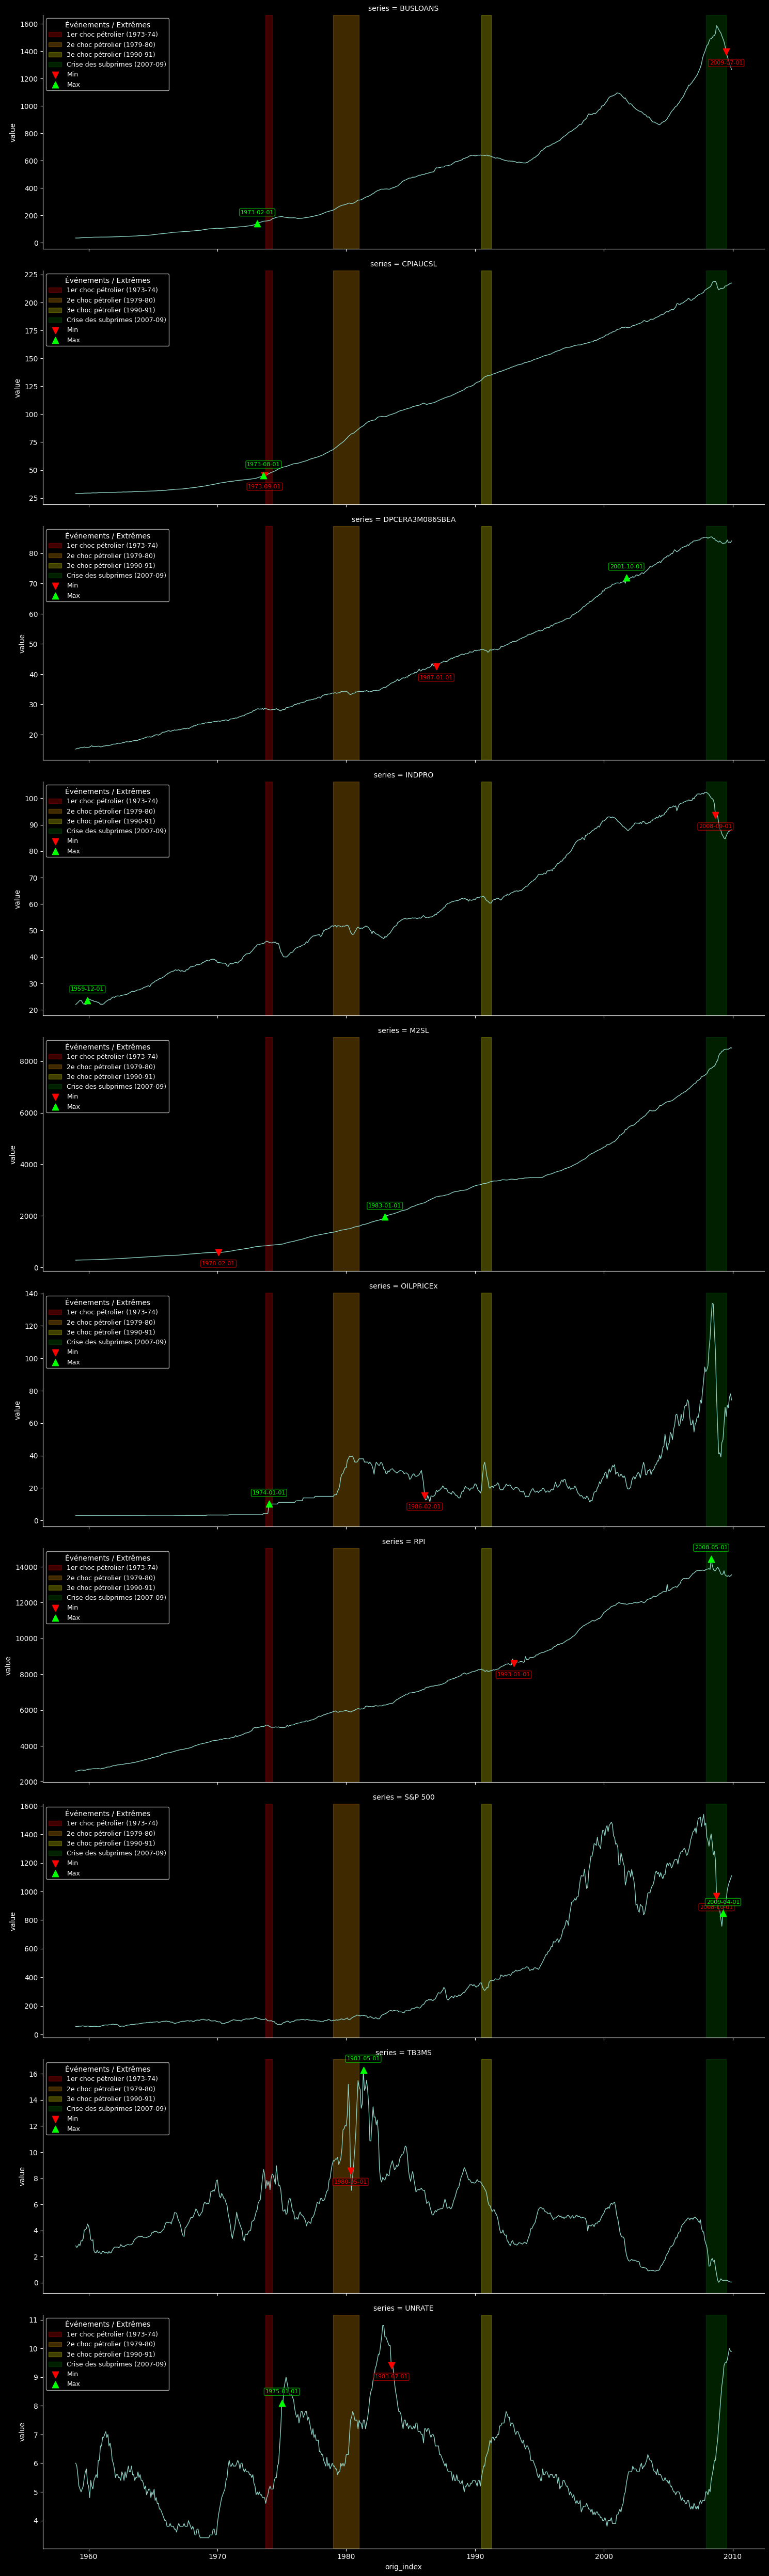

In [ ]:
# S'assurer que l'axe X est bien en datetime
if not np.issubdtype(pd.Series(df_train_long["orig_index"]).dtype, np.datetime64):
    df_train_long["orig_index"] = pd.to_datetime(df_train_long["orig_index"])

plt.style.use("dark_background")

g = sns.relplot(
    data=df_train_long,
    x="orig_index", y="value",
    col="series", col_wrap=1,
    kind="line", linewidth=1,
    facet_kws=dict(sharey=False),
    hue=None,
    height=5, aspect=3
)

date_fmt = "%Y-%m-%d"  # adapte en "%Y-%m" ou "%Y" selon ton pas temporel

for ax in g.axes.flatten():
    # Récupère le nom de la série du titre "series = XXX"
    series_name = ax.get_title().replace("series = ", "")

    # Sous-ensemble pour cette série
    sub = df_train_long[df_train_long["series"] == series_name]

    # Zones d'événements (si définies ailleurs)
    if 'bands' in globals() and 'colors' in globals() and 'labels' in globals():
        for (start, end), cl, lab in zip(bands, colors, labels):
            ax.axvspan(start, end, color=cl, alpha=0.25, label=lab)

    # --- Points Min (is_min == 1) ---
    sub_min = sub.loc[sub["is_min"] == 1, ["orig_index", "value"]]
    if not sub_min.empty:
        ax.scatter(
            sub_min["orig_index"], sub_min["value"],
            marker="v", color="red", s=80, zorder=5, label="Min"
        )
        # Annoter les dates
        for _, r in sub_min.iterrows():
            ax.annotate(
                r["orig_index"].strftime(date_fmt),
                xy=(r["orig_index"], r["value"]),
                xytext=(0, -12), textcoords="offset points",
                ha="center", va="top", fontsize=8, color="red",
                bbox=dict(boxstyle="round,pad=0.2", fc="black", ec="red", alpha=0.6)
            )

    # --- Points Max (is_max == 1) ---
    sub_max = sub.loc[sub["is_max"] == 1, ["orig_index", "value"]]
    if not sub_max.empty:
        ax.scatter(
            sub_max["orig_index"], sub_max["value"],
            marker="^", color="lime", s=80, zorder=5, label="Max"
        )
        # Annoter les dates
        for _, r in sub_max.iterrows():
            ax.annotate(
                r["orig_index"].strftime(date_fmt),
                xy=(r["orig_index"], r["value"]),
                xytext=(0, 12), textcoords="offset points",
                ha="center", va="bottom", fontsize=8, color="lime",
                bbox=dict(boxstyle="round,pad=0.2", fc="black", ec="lime", alpha=0.6)
            )

    # Améliorer lisibilité axe X
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

    # Légende dédoublonnée
    handles, labels_ax = ax.get_legend_handles_labels()
    by_label = dict(zip(labels_ax, handles))
    ax.legend(by_label.values(), by_label.keys(),
              loc="upper left", fontsize=9, title="Événements / Extrêmes")

plt.show()

# Interprétation

On remarque que juste après chaque crise, le taux de chômage ne fait qu'accroitre. L'augmentation la plus sévère a été au début des années 75s. En effet, si le taux de chômage tourne autour de 5,6% en 1974, il est passé de 8% environ en janvier 1975. Il a atteint son niveau le plus élevé durant le deuxième choc pétrolier avec un taux de chômage plus de 10%. Ce qui a été compensé par une baisse la plus rapide aussi en seconde semestre de l'année 1983. La crise des années 90 a été moins marqué, même si le chômage se dégrade. La crise de Subprime confirme notre analyse. 

Une hausse de chômage va de pair avec la diminution de la production industrielle. Sa baisse la plus spectaculaire a été enregistré vers le mois de Septembre 2008 en pleine crise de Subprimes : plus de 10 points. 

C'est normal puisque le crédit alloué aux activités commerciales et aux industries (BUSLOAN) ont chutté juste avant et depuis la déclaration de la faillite de Lehman Brother le même mois. 

L'indice boursier S&P 500 confirme la grave récession à l'époque, elle tombe de 7,8% en moyenne d'Octobre 2008 au mois de Mars de 2009. Illustrant le marché financier à son bas niveau, l'intérêt de la dette publique américaine a suivi la baisse de performance. Puisque les bons de trésor américains encourent de grande risque à l'époque, la baisse de l'intérêt incite les investisseurs de prendre plus de risque. La reprise n'a pas tardé puisque le mois d'Avril, l'indice a repris son meilleur niveau après. 

Bien sûr, la consommation suit naturellement cette tendance. 

In [ ]:
# Evolution du taux de chômage dans les années 70
UNRATE_mean_1973 = df_train["UNRATE"].loc["1973"].mean()
UNRATE_mean_1974 = df_train["UNRATE"].loc["1974"].mean()
UNRATE_mean_1975 = df_train["UNRATE"].loc["1975"].mean()
print(UNRATE_mean_1973, UNRATE_mean_1974, UNRATE_mean_1975)

4.858333333333333 5.641666666666667 8.475


In [ ]:
# Evolution du taux de chômage dans les années 80
UNRATE_mean_1980 = df_train["UNRATE"].loc["1980"].mean()
UNRATE_mean_1981 = df_train["UNRATE"].loc["1981"].mean()
UNRATE_mean_1982 = df_train["UNRATE"].loc["1982"].mean()
print(UNRATE_mean_1980, UNRATE_mean_1981, UNRATE_mean_1982)

7.175000000000001 7.616666666666667 9.708333333333334


In [24]:
INDPRO_mean_1973 = df_train["INDPRO"].loc["1973"].mean()
INDPRO_mean_1974 = df_train["INDPRO"].loc["1974"].mean()
INDPRO_mean_1975 = df_train["INDPRO"].loc["1975"].mean()
print(INDPRO_mean_1973, INDPRO_mean_1974, INDPRO_mean_1975)

45.048233333333336 44.916799999999995 40.91483333333333


In [25]:
# INDPRO
INDPRO_mean_2007 = df_train["INDPRO"].loc["2007"].mean()
INDPRO_mean_2008 = df_train["INDPRO"].loc["2008"].mean()
INDPRO_mean_2009 = df_train["INDPRO"].loc["2009"].mean()
print(INDPRO_mean_2007, INDPRO_mean_2008, INDPRO_mean_2009)

101.45753333333334 97.94586666666667 86.79653333333334


In [42]:
df_train["S&P 500"].loc["2009"]

date
2009-01-01     865.58
2009-02-01     805.23
2009-03-01     757.13
2009-04-01     848.15
2009-05-01     902.41
2009-06-01     926.12
2009-07-01     935.82
2009-08-01    1009.73
2009-09-01    1044.55
2009-10-01    1067.66
2009-11-01    1088.07
2009-12-01    1110.38
Name: S&P 500, dtype: float64

In [43]:
# Accroissement du taux de chômage avec la crise
## Taux de croissance de la production industrielle durant le Covid-19
SP500_2008 = df_train["S&P 500"].loc["2008"]
SP500_2009 = df_train["S&P 500"].loc["2009"]

# valeurs initiale et finale
v0 = SP500_2008.iloc[9]
v1 = SP500_2009.iloc[2]

# nombre de périodes (mois ici)
n = 3

# taux de croissance moyen (CAGR)
cagr = (v1 / v0) ** (1/n) - 1
print(f"Taux de croissance moyen mensuel entre février 2020 à Avril 2020 : {cagr:.2%}")

Taux de croissance moyen mensuel entre février 2020 à Avril 2020 : -7.89%


In [28]:
df_train.columns

Index(['UNRATE', 'TB3MS', 'RPI', 'INDPRO', 'DPCERA3M086SBEA', 'S&P 500',
       'BUSLOANS', 'CPIAUCSL', 'OILPRICEx', 'M2SL', 'index_min_UNRATE',
       'index_max_UNRATE', 'index_min_TB3MS', 'index_max_TB3MS',
       'index_min_RPI', 'index_max_RPI', 'index_min_INDPRO',
       'index_max_INDPRO', 'index_min_DPCERA3M086SBEA',
       'index_max_DPCERA3M086SBEA', 'index_min_S&P 500', 'index_max_S&P 500',
       'index_min_BUSLOANS', 'index_max_BUSLOANS', 'index_min_CPIAUCSL',
       'index_max_CPIAUCSL', 'index_min_OILPRICEx', 'index_max_OILPRICEx',
       'index_min_M2SL', 'index_max_M2SL'],
      dtype='object')